# Seaborn

[Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. 

The following examples are taken from the documentation/tutorial.

In [32]:
%pylab inline
import pandas as pd
import seaborn as sns
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


## Plotting univariate distributions ##

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).

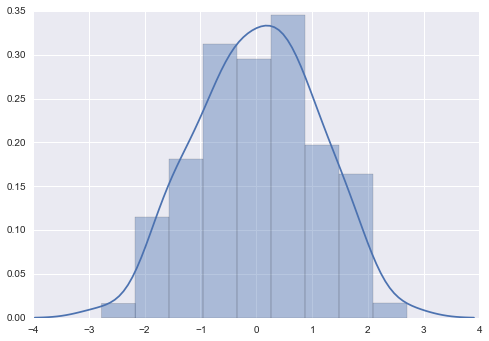

In [12]:
x = randn(100)
sns.distplot(x)

## Histograms

Histograms are likely familiar, and a hist function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

To illustrate this, let’s remove the density curve and add a rug plot, which draws a small vertical tick at each observation. You can make the rug plot itself with the rugplot() function, but it is also available in distplot():

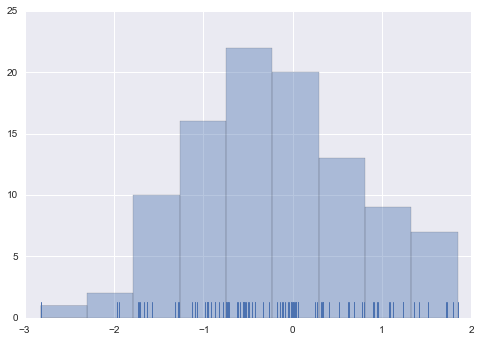

In [3]:
sns.distplot(x, kde=False, rug=True);

## Fitting parametric distributions

You can also use distplot() to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data:

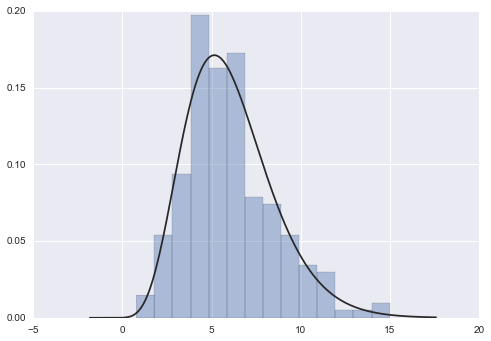

In [4]:
x = np.random.gamma(6, size=200)
p=sns.distplot(x, kde=False, fit=stats.gamma);

In [23]:
sns.distplot?? # Look up source code for details

In [5]:
params=stats.gamma.fit(x) 

## Plotting bivariate distributions

It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

### Scatterplots

The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values. This is analgous to a rug plot on two dimensions. You can draw a scatterplot with the matplotlib plt.scatter function, and it is also the default kind of plot shown by the jointplot() function:

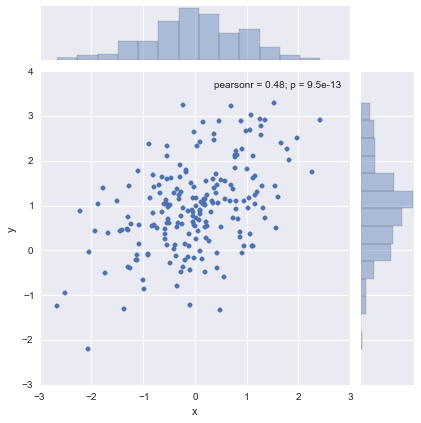

In [13]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df);

# Scipy.stats

The module [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html) contains a large number of probability distributions as well as a growing library of statistical functions.

In the following we switch to numpy arrays to apply a linear regression

In [18]:
stats.linregress?

In [23]:
x=df['x'].values
y=df['y'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

0.512121985129 0.963401879787 0.47679859062 9.52046441387e-13 0.0670966673173


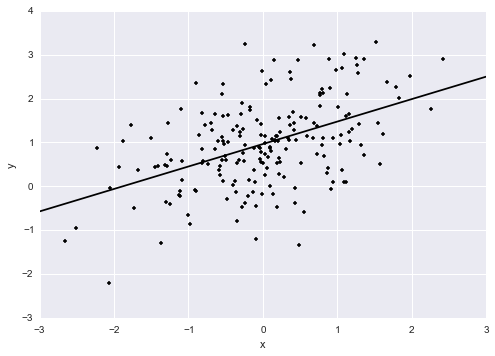

In [30]:
X=linspace(-3,3)
Y=slope*X+intercept
plot(x,y,'k.',X,Y,'k-')
xlabel('x')
ylabel('y')

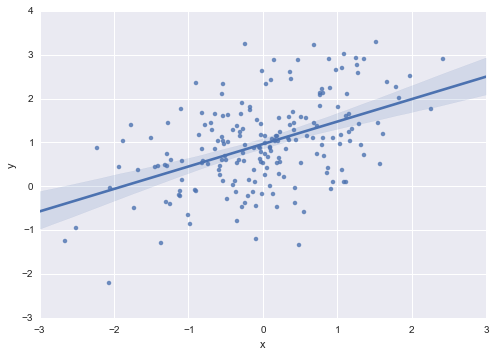

In [29]:
# Shorter with seaborn + uncertainty of fit
sns.regplot(x='x',y='y',data=df)